이번 챕터에서는 데이터를 로드하는 방법과 미니 배치 경사 하강법(Mini batch Gradient Descent)에 대해 학습한다.
## 1. 미니 배치와 배치 크기(Mini Batch and Batch Size)
---
앞서 배운 다중 선형 회귀에서 사용했던 데이터를 상기해본다.<br>
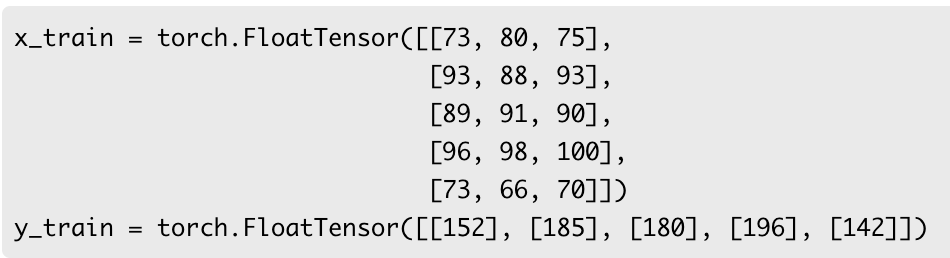
위 데이터의 샘플의 개수는 5개다. 전체 데이터를 하나의 행렬로 선언하여 전체 데이터에 대해서 경사 하강법을 수행하여 학습할 수 있다. 그런데 위 데이터는 현업에서 다루게 되는 방대한 양의 데이터에 비하면 굉장히 적은 양이다. 만약 데이터가 수십만개 이상이라면 전체 데이터에 대해서 경사 하강법을 수행하는 것은 매우 느릴 뿐만 아니라 많은 계산량이 필요하다. 어쩌면 메모리의 한계로 계산이 불가능한 경우도 있다. <br><br>
그렇기 때문에 전체 데이터를 더 작은 단위로 나누어서 해당 단위로 학습하는 개념이 나오게 되었다.<br>
이 단위를 미니 배치(Mini Batch)라고 한다.
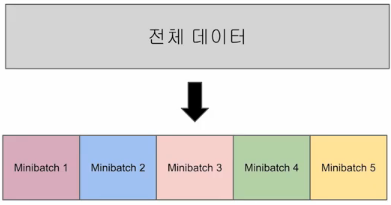
위의 그림은 전체 데이터를 미니 배치 단위로 나눈 것을 보여준다. 미니 배치 학습을 하게 되면 미니 배치만큼만 가져가서 미니 배치에 대한 비용(cost)를 계산하고, 경사 하강법을 수행한다. 그리고 다음 미니 배치를 가져가서 경사 하강법을 수행하고 마지막 미니 배치까지 이를 반복한다. 이렇게 전체 데이터에 대한 학습이 1회 끝나면 1 에포크(Epoch)가 끝나게 된다.
- Epoch는 전체 훈련 데이터가 학습에 한 번 사용된 주기를 말한다.<br>

<br>미니 배치 학습에서는 미니 배치의 개수만큼 경사 하강법을 수행해야 전체 데이터가 한 번 전부 사용되어 1 epoch가 된다. 미니 배치의 개수는 결국 미니 배치의 크기를 몇으로 하느냐에 따라서 달라즌데 미니 배치의 크기를 batch size라고 한다.<br>

- **전체 데이터에 대해서 한 번에 경사 하강법을 수행하는 방법을 '배치 경사 하강법'이라고 부른다. 반면, 미니 배치 단위로 경사 하강법을 수행하는 방법을 '미니 배치 경사 하강법'이라고 부른다.**
- **배치 경사 하강법은 경사 하강법을 할 때, 전체 데이터를 사용하므로 가중치 값이 최적값에 수렴하는 과정이 매우 안정적이지만, 계산량이 너무 많이 든다. 미니 배치 경사 하강법은 경사 하강법을 할 때, 전체 데이터의 일부만을 보고 수행하므로 최적값으로 수렴하는 과정에서 값이 조금 헤매기도 하지만 훈련 속도가 빠르다.**
- 배치 크기는 보통 2의 제곱수를 사용한다. ex) 2, 4, 8, 16, 32, 64... 그 이유는 CPU와 GPU의 메모리가 2의 배수이므로 배치크기가 2의 제곱수일 경우에 데이터 송수신의 효율을 높일 수 있다.

## 2. 이터레이션(Iteration)
---
미니 배치와 배치 크기의 정의에 대해서 이해했다면 이터레이션(iteration)을 정의할 수 있다.
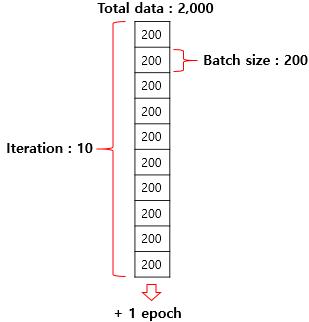
위의 그림은 에포크와 배치 크기와 이터레이션의 관계를 보여준다. 위의 그림의 예제를 통해 설명해본다.<br><br>
이터레이션은 한 번의 에포크 내에서 이루어지는 매개변수인 가중치 W와 b의 업데이트 횟수다. 전체 데이터가 2,000일 때 배치 크기를 200으로 한다면 이터레이션의 수는 총 10개다. 이는 한 번의 에포크 당 매개변수 업데이트가 10번 이루어짐을 의미한다.

## 3. 데이터 로드하기(Data Load)
---
파이토치에서는 데이터를 좀 더 쉽게 다룰 수 있도록 유용한 도구로써 ```Dataset```과 ```DataLoader```를 제공한다. 이를 사용하면 **미니 배치 학습**, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있다. 기본적인 사용 방법은 Dataset을 정의하고, 이를 DataLoader에 전달하는 것이다.<br><br>
Dataset을 커스텀하여 만들 수도 있지만 여기서는 텐서를 입력받아 Dataset의 형태로 변환해주는 TensorDataset을 사용한다.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [37]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                            [73,  66,  70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [38]:
dataset = TensorDataset(x_train, y_train)

파이토치의 데이터셋을 만들었다면 데이터로더를 사용 가능하다. 데이터로더는 기본적으로 2개의 인자를 입력 받는다. 하나는 데이터셋, 미니 배치의 크기다. 이때 미니 배치의 크기는 통상적으로 2의 배수를 사용한다. (ex) 64, 128, 256...) 그리고 추가적으로 많이 사용되는 인자로 shuffle이 있다.<br>
shuffle=True를 선택하면 Epoch마다 데이터셋을 섞어서 데이터가 학습되는 순서를 바꾼다.<br><br>
모델이 데이터셋의 순서에 익숙해지는 것을 방지하여 학습할 때는 이 옵션을 주는 것이 좋다.

In [39]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [40]:
len(dataloader)

3

In [41]:
model = nn.Linear(3, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [42]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
#         print(batch_idx)
#         print(samples)
        x_train, y_train = samples
        prediction = model(x_train)
        
        cost = F.mse_loss(prediction, y_train)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 48616.152344
Epoch    0/20 Batch 2/3 Cost: 18599.476562
Epoch    0/20 Batch 3/3 Cost: 5772.917969
Epoch    1/20 Batch 1/3 Cost: 1810.362305
Epoch    1/20 Batch 2/3 Cost: 433.620056
Epoch    1/20 Batch 3/3 Cost: 22.933073
Epoch    2/20 Batch 1/3 Cost: 59.443184
Epoch    2/20 Batch 2/3 Cost: 39.842522
Epoch    2/20 Batch 3/3 Cost: 56.019524
Epoch    3/20 Batch 1/3 Cost: 9.782408
Epoch    3/20 Batch 2/3 Cost: 22.557800
Epoch    3/20 Batch 3/3 Cost: 3.225799
Epoch    4/20 Batch 1/3 Cost: 14.792837
Epoch    4/20 Batch 2/3 Cost: 13.952623
Epoch    4/20 Batch 3/3 Cost: 27.716684
Epoch    5/20 Batch 1/3 Cost: 7.328430
Epoch    5/20 Batch 2/3 Cost: 13.694927
Epoch    5/20 Batch 3/3 Cost: 29.745394
Epoch    6/20 Batch 1/3 Cost: 17.310682
Epoch    6/20 Batch 2/3 Cost: 9.667736
Epoch    6/20 Batch 3/3 Cost: 28.977463
Epoch    7/20 Batch 1/3 Cost: 13.659153
Epoch    7/20 Batch 2/3 Cost: 7.271537
Epoch    7/20 Batch 3/3 Cost: 29.617870
Epoch    8/20 Batch 1/3 Cost: 6.87

이제 모델의 입력으로 임의의 값을 넣어 예측값을 확인해본다.

In [43]:
new_var = torch.FloatTensor([[73, 80, 75]])

pred_y = model(new_var)
print('훈련 후 입력이 73, 80, 75일 때의 예측값 :', pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[155.7724]], grad_fn=<AddmmBackward>)


In [52]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.4075, 1.2471, 0.3572]], requires_grad=True), Parameter containing:
tensor([-0.5348], requires_grad=True)]
